### Importing Libraries

In [ ]:
# --- Basic imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- ML imports ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Display settings ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

print("Successfully imported all libraries.")

Successfully imported all libraries.


### Loading Dataset

In [ ]:
# Loading dataset
df = pd.read_csv("../data/data.csv")

# Showing basic info
print("Dataset is loaded")
print(f"Shape: {df.shape}") # Printing shape of the dataset
df.head()  # Display first five rows

Dataset loaded successfully!
Shape: (1341, 6)


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.726,33.990,439.73
1,AUS,1972,15.091,0.685,34.184,450.44
2,AUS,1973,15.117,0.681,37.956,507.85
3,AUS,1974,14.771,0.754,45.338,622.17
4,AUS,1975,11.849,0.682,44.363,616.34


In [11]:
# Info about data types and missing values
print("\n--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
display(df.describe()) # Displaying descriptive statistics (mean, std, min, max, etc.)

print("\n--- Data Types ---")
display(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum()) # Displaying missing values per column


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB

--- Descriptive Statistics ---


,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,2001.134228,16.632877,1.215524,338.278398,14439.322088
std,14.093659,6.613320,0.479568,226.158326,43259.358895
min,1970.000000,5.545000,0.207000,3.628000,5.810000
25%,1990.000000,11.849000,0.802000,144.592000,756.280000
50%,2004.000000,15.238000,1.187000,317.795000,2786.190000
75%,2013.000000,20.580000,1.524000,496.858000,8794.360000
max,2022.000000,40.239000,2.870000,1432.309000,475596.740000



--- Data Types ---


LOCATION        object
TIME             int64
PC_HEALTHXP    float64
PC_GDP         float64
USD_CAP        float64
TOTAL_SPEND    float64
dtype: object


--- Missing Values ---
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64


### Exploratory Data Analysis (EDA)

In [ ]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(nrows=len(num_cols)//2 + 1, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

for col in num_cols:
    if col != 'TIME':  # Skip TIME as it's just years
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Variance: {df[col].var():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Max: {df[col].max():.2f}")

plt.tight_layout()
plt.show()


### Correlation Matrix

In [ ]:
# 6. CORRELATION MATRIX
correlation_matrix = df[num_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Healthcare Expenditure Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


### Scatter plots, histograms, box plots


CREATING VISUALIZATIONS FOR SCATTER PLOTS, HISTOGRAMS, AND BOX PLOTS


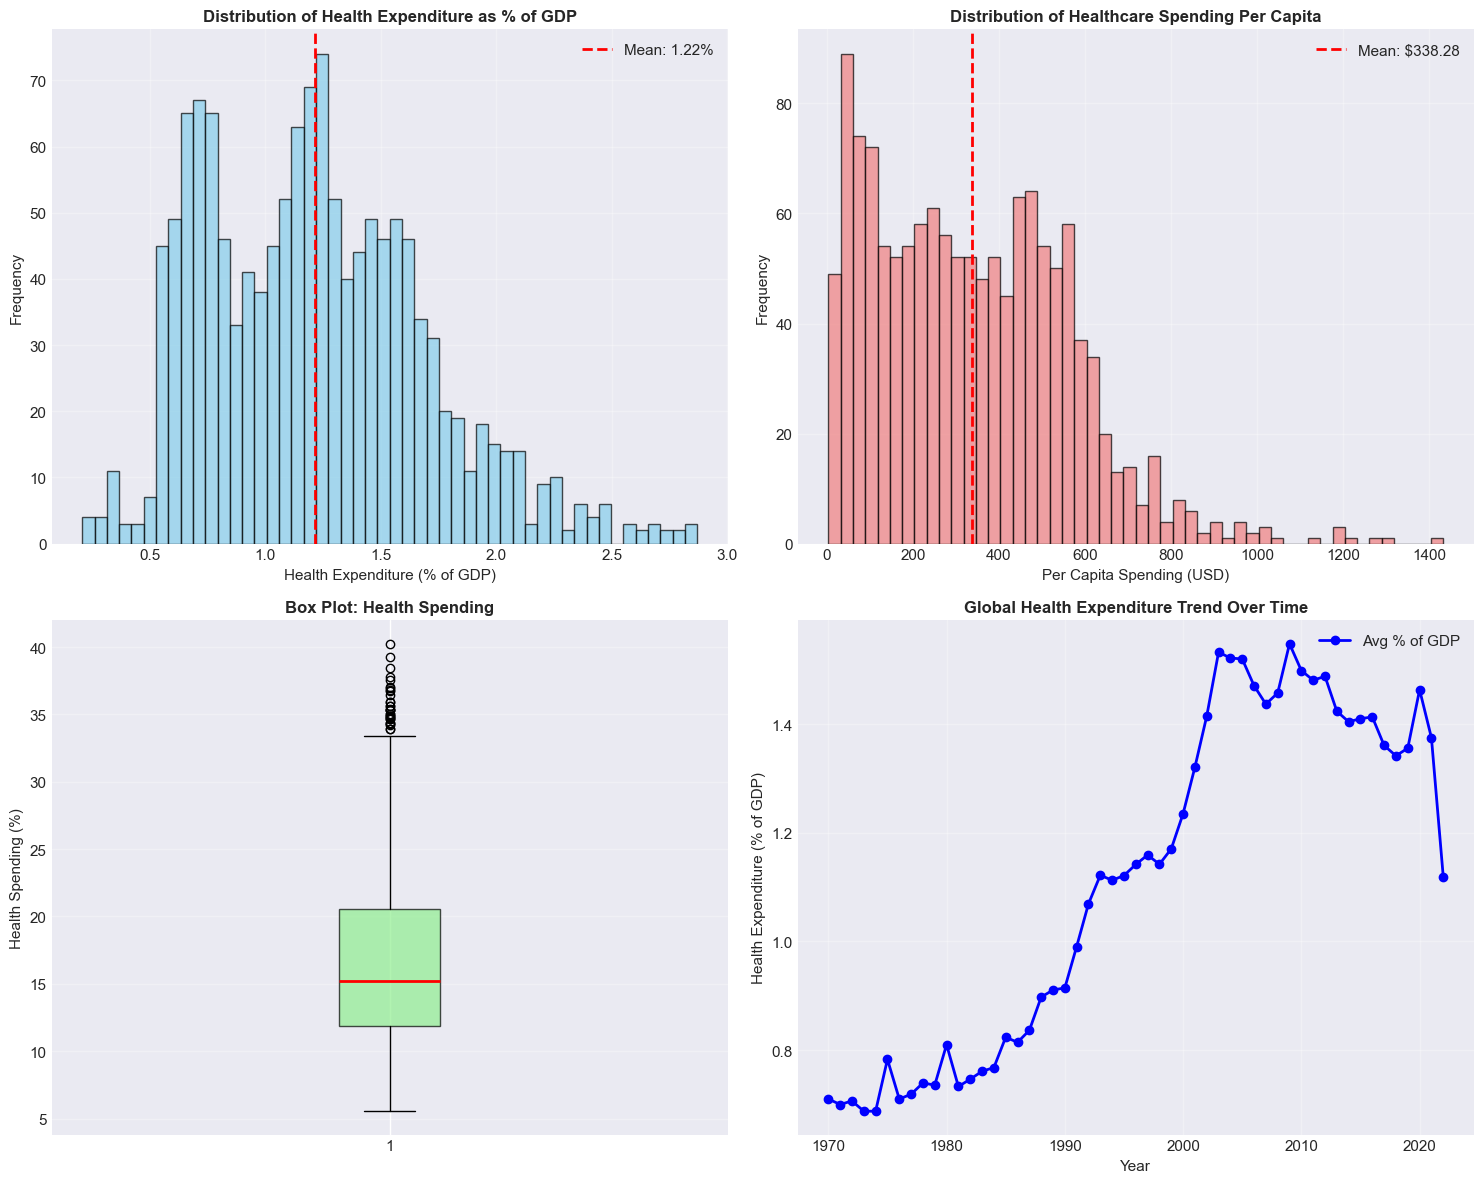

In [32]:
print("\nCREATING VISUALIZATIONS FOR SCATTER PLOTS, HISTOGRAMS, AND BOX PLOTS")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# A. Distribution of Health Expenditure as % of GDP
axes[0, 0].hist(df['PC_GDP'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Health Expenditure (% of GDP)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Health Expenditure as % of GDP', 
                      fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['PC_GDP'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: {df["PC_GDP"].mean():.2f}%')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# B. Distribution of Per Capita Spending in USD
axes[0, 1].hist(df['USD_CAP'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Per Capita Spending (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Healthcare Spending Per Capita', 
                      fontsize=12, fontweight='bold')
axes[0, 1].axvline(df['USD_CAP'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: ${df["USD_CAP"].mean():.2f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# C. Box plot for % of Health spending
axes[1, 0].boxplot(df['PC_HEALTHXP'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Health Spending (%)', fontsize=11)
axes[1, 0].set_title('Box Plot: Health Spending', 
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# D. Time series trend
time_grouped = df.groupby('TIME')[['PC_GDP', 'USD_CAP']].mean()
axes[1, 1].plot(time_grouped.index, time_grouped['PC_GDP'], 
                marker='o', linewidth=2, label='Avg % of GDP', color='blue')
axes[1, 1].set_xlabel('Year', fontsize=11)
axes[1, 1].set_ylabel('Health Expenditure (% of GDP)', fontsize=11)
axes[1, 1].set_title('Global Health Expenditure Trend Over Time', 
                      fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

### Part C. Data Preparation

In [44]:
print("DATA PREPARATION & PREPROCESSING")

# Created a copy for processing
df_processed = df.copy()

print("\n1. HANDLING MISSING VALUES")
# Check again for missing values
print(f"Missing values before handling:\n{df_processed.isnull().sum()}")

# If there were any missing values, I would handle them here
# For example: df_processed.fillna(method='ffill', inplace=True)
# But the dataset is clean!
print("No missing values to handle!")

print("\n2. OUTLIER DETECTION")
print("-" * 40)
# Detect outliers using IQR method
outlier_summary = {}
for col in num_cols:
    if col != 'TIME':
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_processed[(df_processed[col] < lower_bound) | 
                                 (df_processed[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
        print(f"{col}: {len(outliers)} outliers detected")


print("\n3. FEATURE ENGINEERING")
print("-" * 40)

# Creating new features
# Years since first recorded data
df_processed['YEARS_SINCE_START'] = df_processed['TIME'] - df_processed['TIME'].min()

# Spending ratio: Health spending
df_processed['SPENDING_RATIO'] = df_processed['PC_HEALTHXP'] / (df_processed['PC_GDP'] + 0.0001)

# GDP per capita growth indicator (simplified)
df_processed['DECADE'] = (df_processed['TIME'] // 10) * 10

# Log transformations for skewed variables
df_processed['LOG_TOTAL_SPEND'] = np.log1p(df_processed['TOTAL_SPEND'])
df_processed['LOG_USD_CAP'] = np.log1p(df_processed['USD_CAP'])


print("Created new features:")
print("  • YEARS_SINCE_START: Years from baseline")
print("  • SPENDING_RATIO: Health spending to GDP ratio")
print("  • DECADE: Decade categorization")
print("  • LOG_TOTAL_SPEND: Log-transformed total spending")
print("  • LOG_USD_CAP: Log-transformed per capita spending")

print("\n4. ENCODING CATEGORICAL VARIABLES")
print("-" * 40)

# Label encode country codes
le = LabelEncoder()
df_processed['LOCATION_ENCODED'] = le.fit_transform(df_processed['LOCATION'])

print(f"Encoded LOCATION into numeric values")
print(f"  Number of unique countries: {df_processed['LOCATION'].nunique()}")

# Save the label encoder mapping
country_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nCountry Code Mappings (first 10):")
for i, (country, code) in enumerate(list(country_mapping.items())[:10]):
    print(f"  {country} → {code}")

print("\n5. FEATURE SELECTION FOR MODELING")
print("-" * 40)

# Define features and target
# We'll predict USD_CAP (per capita spending) as our target
feature_cols = ['LOCATION_ENCODED', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 
                'TOTAL_SPEND', 'YEARS_SINCE_START', 'SPENDING_RATIO']

target_col = 'USD_CAP'

X = df_processed[feature_cols]
y = df_processed[target_col]

print(f"Features selected: {len(feature_cols)} features")
print(f"Target variable: {target_col}")
print(f"\nFeature columns: {feature_cols}")

print("\n6. TRAIN-TEST SPLIT")
print("-" * 40)

# Split data: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\n7. FEATURE SCALING")
print("-" * 40)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler (mean=0, std=1)")
print(f"\nScaling parameters:")
print(f"  Mean values: {scaler.mean_[:3]}... (first 3 features)")
print(f"  Std values: {scaler.scale_[:3]}... (first 3 features)")

print("\n Data Preparation Complete!")


DATA PREPARATION & PREPROCESSING

1. HANDLING MISSING VALUES
Missing values before handling:
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64
No missing values to handle!

2. OUTLIER DETECTION
----------------------------------------
PC_HEALTHXP: 32 outliers detected
PC_GDP: 12 outliers detected
USD_CAP: 9 outliers detected
TOTAL_SPEND: 222 outliers detected

3. FEATURE ENGINEERING
----------------------------------------
Created new features:
  • YEARS_SINCE_START: Years from baseline
  • SPENDING_RATIO: Health spending to GDP ratio
  • DECADE: Decade categorization
  • LOG_TOTAL_SPEND: Log-transformed total spending
  • LOG_USD_CAP: Log-transformed per capita spending

4. ENCODING CATEGORICAL VARIABLES
----------------------------------------
Encoded LOCATION into numeric values
  Number of unique countries: 44

Country Code Mappings (first 10):
  AUS → 0
  AUT → 1
  BEL → 2
  BGR → 3
  BRA → 4
  CAN → 5
  CHE → 6
  CH

### Model Training

In [46]:
print("Model Training")

models_performance = {}

# MODEL 1: LINEAR REGRESSION
print("\n1. LINEAR REGRESSION")
print("-" * 40)
print("Description: Simple linear model assuming linear relationship")
print("Hyperparameters: Default (no regularization)")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_val_pred_lr = lr_model.predict(X_val_scaled)

print("Linear Regression trained successfully!")

# MODEL 2: RANDOM FOREST REGRESSOR
print("\n2. RANDOM FOREST REGRESSOR")
print("-" * 40)
print("Description: Ensemble of decision trees with bagging")
print("Hyperparameters:")
print("  • n_estimators: 100 (number of trees)")
print("  • max_depth: 15 (maximum tree depth)")
print("  • min_samples_split: 5")
print("  • min_samples_leaf: 2")
print("  • random_state: 42")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

print("Random Forest trained successfully!")

# ============================================
# MODEL 3: GRADIENT BOOSTING REGRESSOR
# ============================================
print("\n3. GRADIENT BOOSTING REGRESSOR")
print("-" * 40)
print("Description: Sequential ensemble that corrects previous errors")
print("Hyperparameters:")
print("  • n_estimators: 100")
print("  • learning_rate: 0.1")
print("  • max_depth: 5")
print("  • min_samples_split: 4")
print("  • min_samples_leaf: 2")
print("  • subsample: 0.8 (80% data per tree)")
print("  • random_state: 42")

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_val_pred_gb = gb_model.predict(X_val_scaled)

print("Gradient Boosting trained successfully!")

print("\nAll models trained successfully!")

Model Training

1. LINEAR REGRESSION
----------------------------------------
Description: Simple linear model assuming linear relationship
Hyperparameters: Default (no regularization)
Linear Regression trained successfully!

2. RANDOM FOREST REGRESSOR
----------------------------------------
Description: Ensemble of decision trees with bagging
Hyperparameters:
  • n_estimators: 100 (number of trees)
  • max_depth: 15 (maximum tree depth)
  • min_samples_split: 5
  • min_samples_leaf: 2
  • random_state: 42
Random Forest trained successfully!

3. GRADIENT BOOSTING REGRESSOR
----------------------------------------
Description: Sequential ensemble that corrects previous errors
Hyperparameters:
  • n_estimators: 100
  • learning_rate: 0.1
  • max_depth: 5
  • min_samples_split: 4
  • min_samples_leaf: 2
  • subsample: 0.8 (80% data per tree)
  • random_state: 42
Gradient Boosting trained successfully!

All models trained successfully!


### Part E. Model Evaluation

MODEL EVALUATION & COMPARISON

1. DETAILED METRICS COMPARISON
----------------------------------------
            Model    Dataset         MSE      RMSE       MAE       R²  MAPE (%)
Linear Regression      Train 5981.676173 77.341297 55.552723 0.880337 41.203223
Linear Regression Validation 8765.247934 93.622903 68.202369 0.831503 47.776642
    Random Forest      Train  590.000273 24.289921 14.518991 0.988197  6.292079
    Random Forest Validation 2412.648776 49.118721 30.823079 0.953621 11.137492
Gradient Boosting      Train  126.834712 11.262092  8.273969 0.997463  4.004559
Gradient Boosting Validation 1400.292332 37.420480 24.606277 0.973082  9.365248

2. VALIDATION SET PERFORMANCE SUMMARY
----------------------------------------
            Model         MSE      RMSE       MAE       R²  MAPE (%)
Gradient Boosting 1400.292332 37.420480 24.606277 0.973082  9.365248
    Random Forest 2412.648776 49.118721 30.823079 0.953621 11.137492
Linear Regression 8765.247934 93.622903 68.202369 

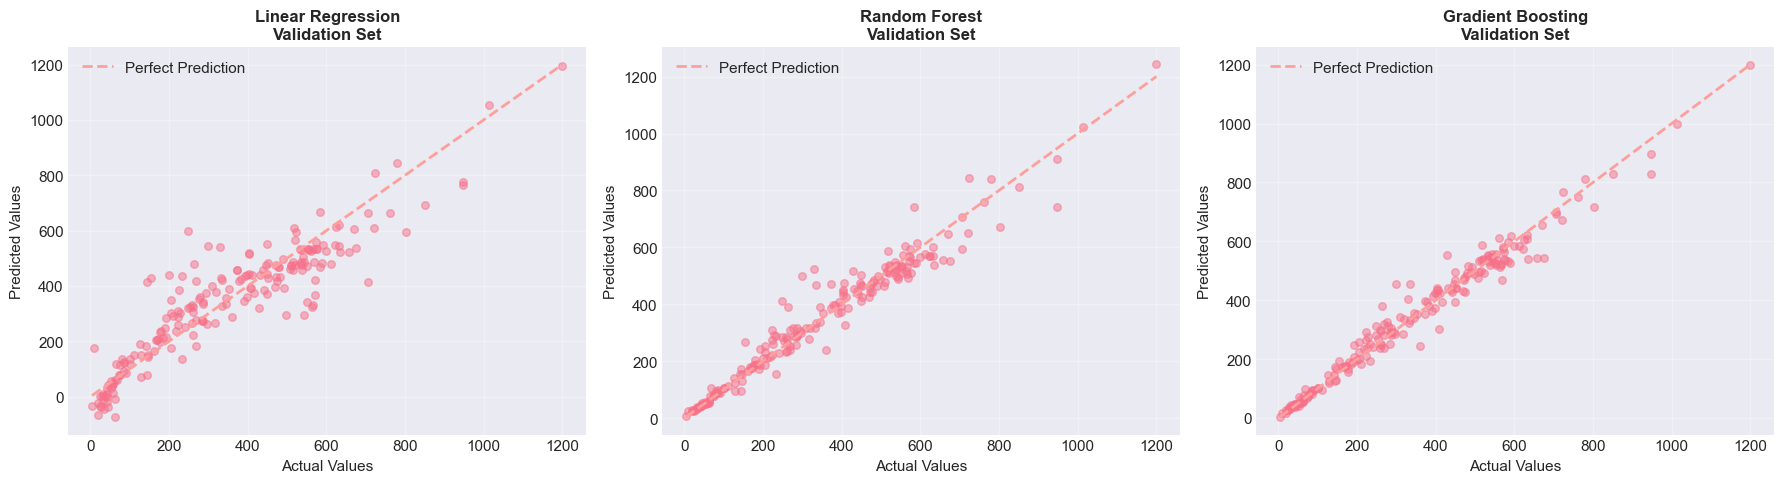


 Prediction comparison plot saved: model_predictions_comparison.png

4. FEATURE IMPORTANCE (Random Forest)
----------------------------------------
          Feature  Importance
             TIME    0.366376
YEARS_SINCE_START    0.280917
   SPENDING_RATIO    0.187294
           PC_GDP    0.065430
      TOTAL_SPEND    0.062139
      PC_HEALTHXP    0.019075
 LOCATION_ENCODED    0.018769


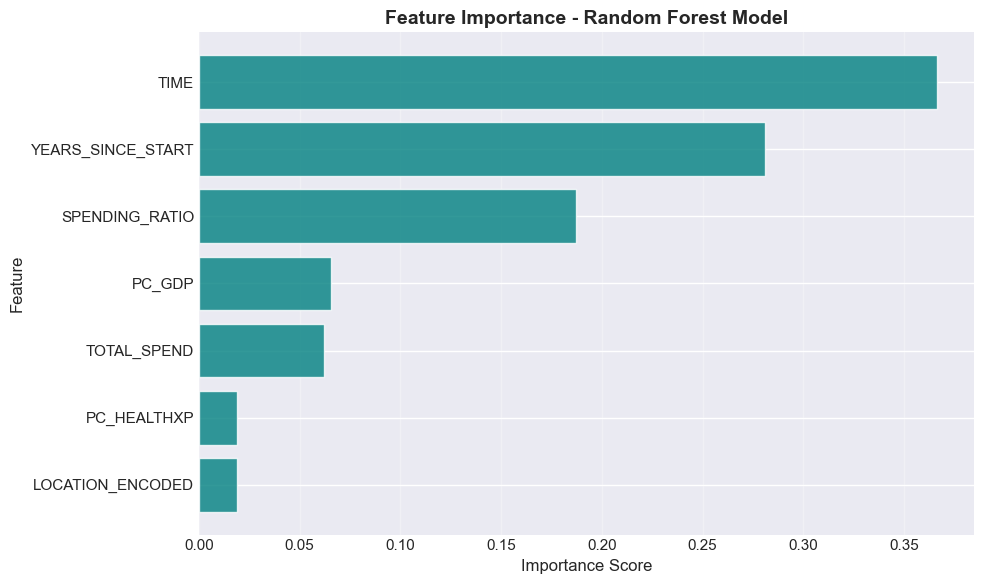


 Feature importance plot saved: feature_importance.png

ANALYSIS COMPLETE!

📊 Summary of Results:
  • Best Model: Gradient Boosting
  • Test R² Score: 0.9837
  • Test RMSE: 30.03
  • Test MAE: 19.45

 All visualizations saved in current directory
 Models ready for deployment

 Models saved: best_model.pkl, scaler.pkl, label_encoder.pkl


In [48]:
print("MODEL EVALUATION & COMPARISON")

def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    """Calculate and return evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE (%)': mape
    }

# Collect all metrics
all_metrics = []

# Linear Regression
all_metrics.append(calculate_metrics(y_train, y_train_pred_lr, 'Linear Regression', 'Train'))
all_metrics.append(calculate_metrics(y_val, y_val_pred_lr, 'Linear Regression', 'Validation'))

# Random Forest
all_metrics.append(calculate_metrics(y_train, y_train_pred_rf, 'Random Forest', 'Train'))
all_metrics.append(calculate_metrics(y_val, y_val_pred_rf, 'Random Forest', 'Validation'))

# Gradient Boosting
all_metrics.append(calculate_metrics(y_train, y_train_pred_gb, 'Gradient Boosting', 'Train'))
all_metrics.append(calculate_metrics(y_val, y_val_pred_gb, 'Gradient Boosting', 'Validation'))

# Create DataFrame
metrics_df = pd.DataFrame(all_metrics)

print("\n1. DETAILED METRICS COMPARISON")
print("-" * 40)
print(metrics_df.to_string(index=False))

# Summary table for validation set only
print("\n2. VALIDATION SET PERFORMANCE SUMMARY")
print("-" * 40)
val_metrics = metrics_df[metrics_df['Dataset'] == 'Validation'].copy()
val_metrics = val_metrics.drop('Dataset', axis=1)
val_metrics = val_metrics.sort_values('R²', ascending=False)
print(val_metrics.to_string(index=False))

# Determine best model
best_model_name = val_metrics.iloc[0]['Model']
best_r2 = val_metrics.iloc[0]['R²']
print(f"\n BEST MODEL: {best_model_name} (R² = {best_r2:.4f})")

# Test set evaluation for best model
print("\n3. FINAL TEST SET EVALUATION")
print("-" * 40)

if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
else:
    best_model = gb_model

y_test_pred = best_model.predict(X_test_scaled)
test_metrics = calculate_metrics(y_test, y_test_pred, best_model_name, 'Test')

print(f"\nFinal Test Set Performance ({best_model_name}):")
for key, value in test_metrics.items():
    if key not in ['Model', 'Dataset']:
        print(f"  {key}: {value:.4f}")

# Visualization of predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_list = [
    ('Linear Regression', y_val_pred_lr),
    ('Random Forest', y_val_pred_rf),
    ('Gradient Boosting', y_val_pred_gb)
]

for idx, (name, predictions) in enumerate(models_list):
    axes[idx].scatter(y_val, predictions, alpha=0.5, s=30)
    axes[idx].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Values', fontsize=11)
    axes[idx].set_ylabel('Predicted Values', fontsize=11)
    axes[idx].set_title(f'{name}\nValidation Set', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Prediction comparison plot saved: model_predictions_comparison.png")

# Feature importance for Random Forest
print("\n4. FEATURE IMPORTANCE (Random Forest)")
print("-" * 40)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal', alpha=0.8)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Feature importance plot saved: feature_importance.png")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\n📊 Summary of Results:")
print(f"  • Best Model: {best_model_name}")
print(f"  • Test R² Score: {test_metrics['R²']:.4f}")
print(f"  • Test RMSE: {test_metrics['RMSE']:.2f}")
print(f"  • Test MAE: {test_metrics['MAE']:.2f}")
print("\n All visualizations saved in current directory")
print(" Models ready for deployment")

# Save the best model for deployment (optional)
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("\n Models saved: best_model.pkl, scaler.pkl, label_encoder.pkl")